## Après cleanning


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('houses_madrid_cleaned.csv', encoding='utf-8')
df.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,is_floor_under,rent_price,buy_price,...,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,product,neighborhood
0,64.0,60.0,2,1.0,NaN,NaN,3,0.0,471,85000,...,NaN,0,NaN,NaN,0.0,1.0,0.0,0.0,piso,135
1,70.0,NaN,3,1.0,NaN,NaN,4,0.0,666,129900,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,piso,132
2,94.0,54.0,2,2.0,NaN,NaN,1,0.0,722,144247,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,piso,134
3,64.0,NaN,2,1.0,NaN,NaN,bajo,1.0,583,109900,...,NaN,0,NaN,NaN,0.0,0.0,1.0,0.0,piso,134
4,108.0,90.0,2,2.0,NaN,NaN,4,0.0,1094,260000,...,NaN,1,1.0,0.0,1.0,1.0,1.0,1.0,piso,133


## Dataset analysis

In [29]:
df.shape

(21742, 37)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   21616 non-null  float64
 1   sq_mt_useful                  8228 non-null   float64
 2   n_rooms                       21742 non-null  int64  
 3   n_bathrooms                   21726 non-null  float64
 4   n_floors                      1437 non-null   float64
 5   sq_mt_allotment               1432 non-null   float64
 6   floor                         19135 non-null  object 
 7   is_floor_under                20572 non-null  float64
 8   rent_price                    21742 non-null  int64  
 9   buy_price                     21742 non-null  int64  
 10  buy_price_by_area             21742 non-null  int64  
 11  is_renewal_needed             21742 non-null  int64  
 12  is_new_development            20750 non-null  object 
 13  b

On remarque la présence de champs vides. Regardons leur proportions plus en détails

/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_64719/4179798459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nul_pourcentage.index, y=nul_pourcentage.values, palette="viridis")


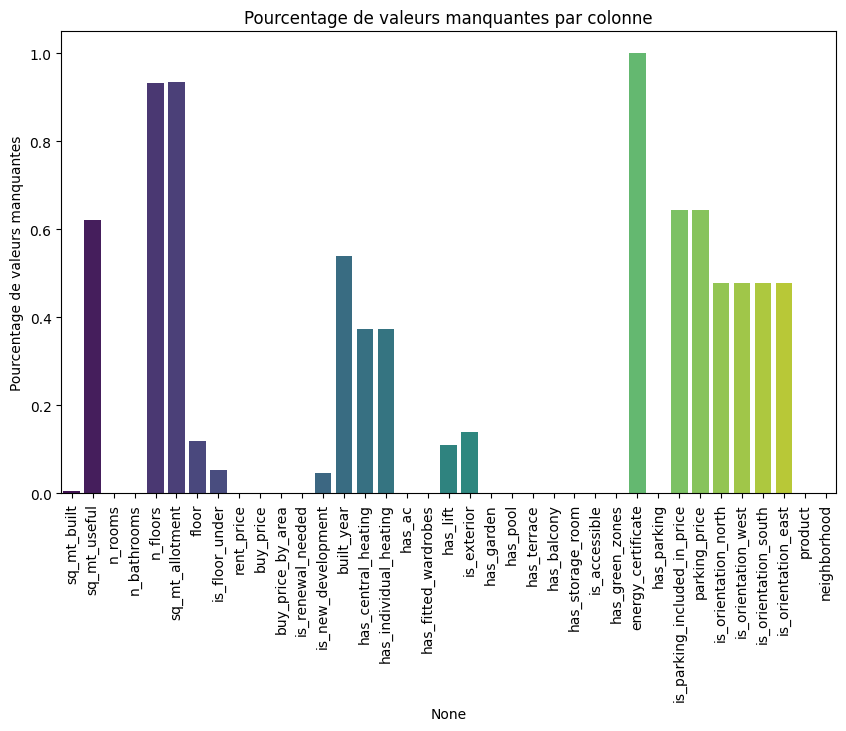

In [31]:
nul_pourcentage = df.isna().mean()
plt.figure(figsize=(10,6))
sns.barplot(x=nul_pourcentage.index, y=nul_pourcentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.ylabel("Pourcentage de valeurs manquantes")
plt.show()


In [32]:
out = nul_pourcentage[nul_pourcentage > 0.5]
print(out)

sq_mt_useful                    0.621562
n_floors                        0.933907
sq_mt_allotment                 0.934137
built_year                      0.540107
energy_certificate              1.000000
is_parking_included_in_price    0.644973
parking_price                   0.644973
dtype: float64


Je supprimes les colonnes avec plus de 50 % de vide

In [33]:
df.drop(columns=out.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sq_mt_built             21616 non-null  float64
 1   n_rooms                 21742 non-null  int64  
 2   n_bathrooms             21726 non-null  float64
 3   floor                   19135 non-null  object 
 4   is_floor_under          20572 non-null  float64
 5   rent_price              21742 non-null  int64  
 6   buy_price               21742 non-null  int64  
 7   buy_price_by_area       21742 non-null  int64  
 8   is_renewal_needed       21742 non-null  int64  
 9   is_new_development      20750 non-null  object 
 10  has_central_heating     13608 non-null  float64
 11  has_individual_heating  13608 non-null  float64
 12  has_ac                  21742 non-null  int64  
 13  has_fitted_wardrobes    21742 non-null  int64  
 14  has_lift                19356 non-null

## Je m'intéresse aux colonnes numériques

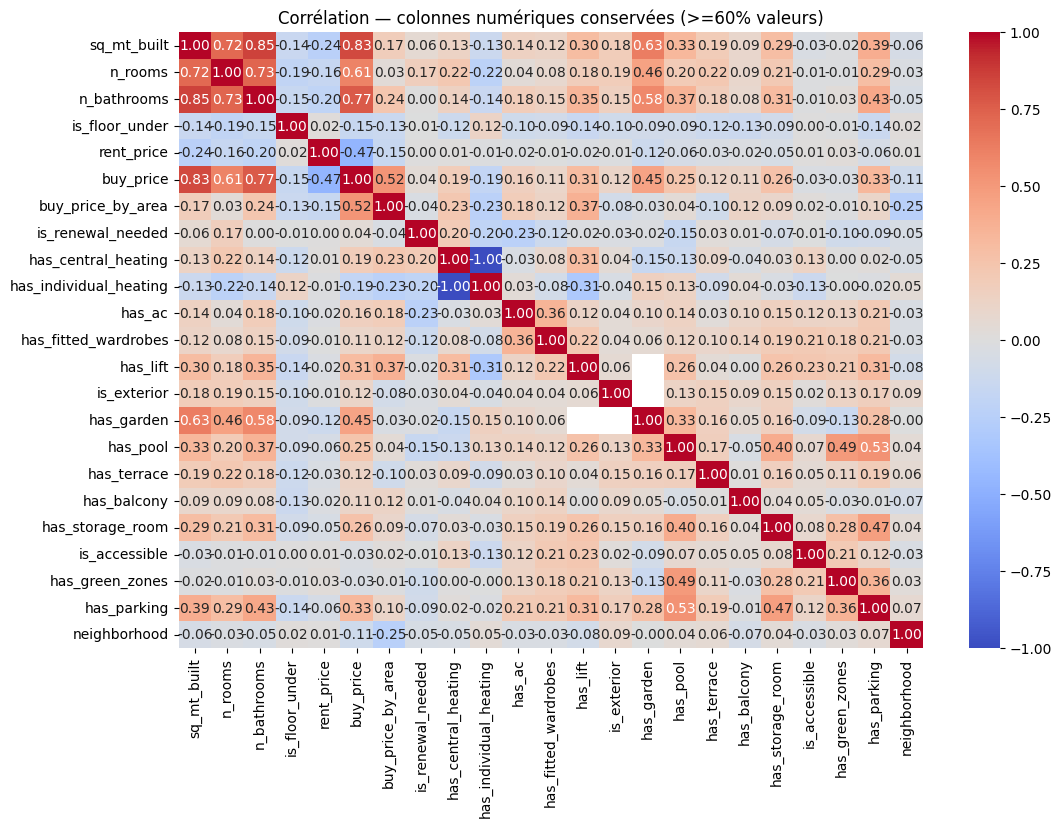

In [34]:
num_df = df.select_dtypes(include=["int64", "float64"])

# seuil : au moins 60% de valeurs non-nulles
threshold = 0.6  

cols_ok = num_df.columns[num_df.notna().mean() > threshold]

num_df_filtered = num_df[cols_ok]

corr = num_df_filtered.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation — colonnes numériques conservées (>=60% valeurs)")
plt.show()


In [36]:
target = "buy_price"

# Calcul des corrélations avec la target
corr = df.corr(numeric_only=True)[target]

# Filtrer les corrélations fortes positives ou négatives
strong_corr = corr[abs(corr) >= 0.3].sort_values(ascending=False)

print("Variables ayant une corrélation >= |0.3| avec la target :")
print(strong_corr)


Variables ayant une corrélation >= |0.3| avec la target :
buy_price            1.000000
sq_mt_built          0.832039
n_bathrooms          0.772218
n_rooms              0.608893
buy_price_by_area    0.519645
has_garden           0.447871
has_parking          0.330515
has_lift             0.311371
rent_price          -0.468449
Name: buy_price, dtype: float64


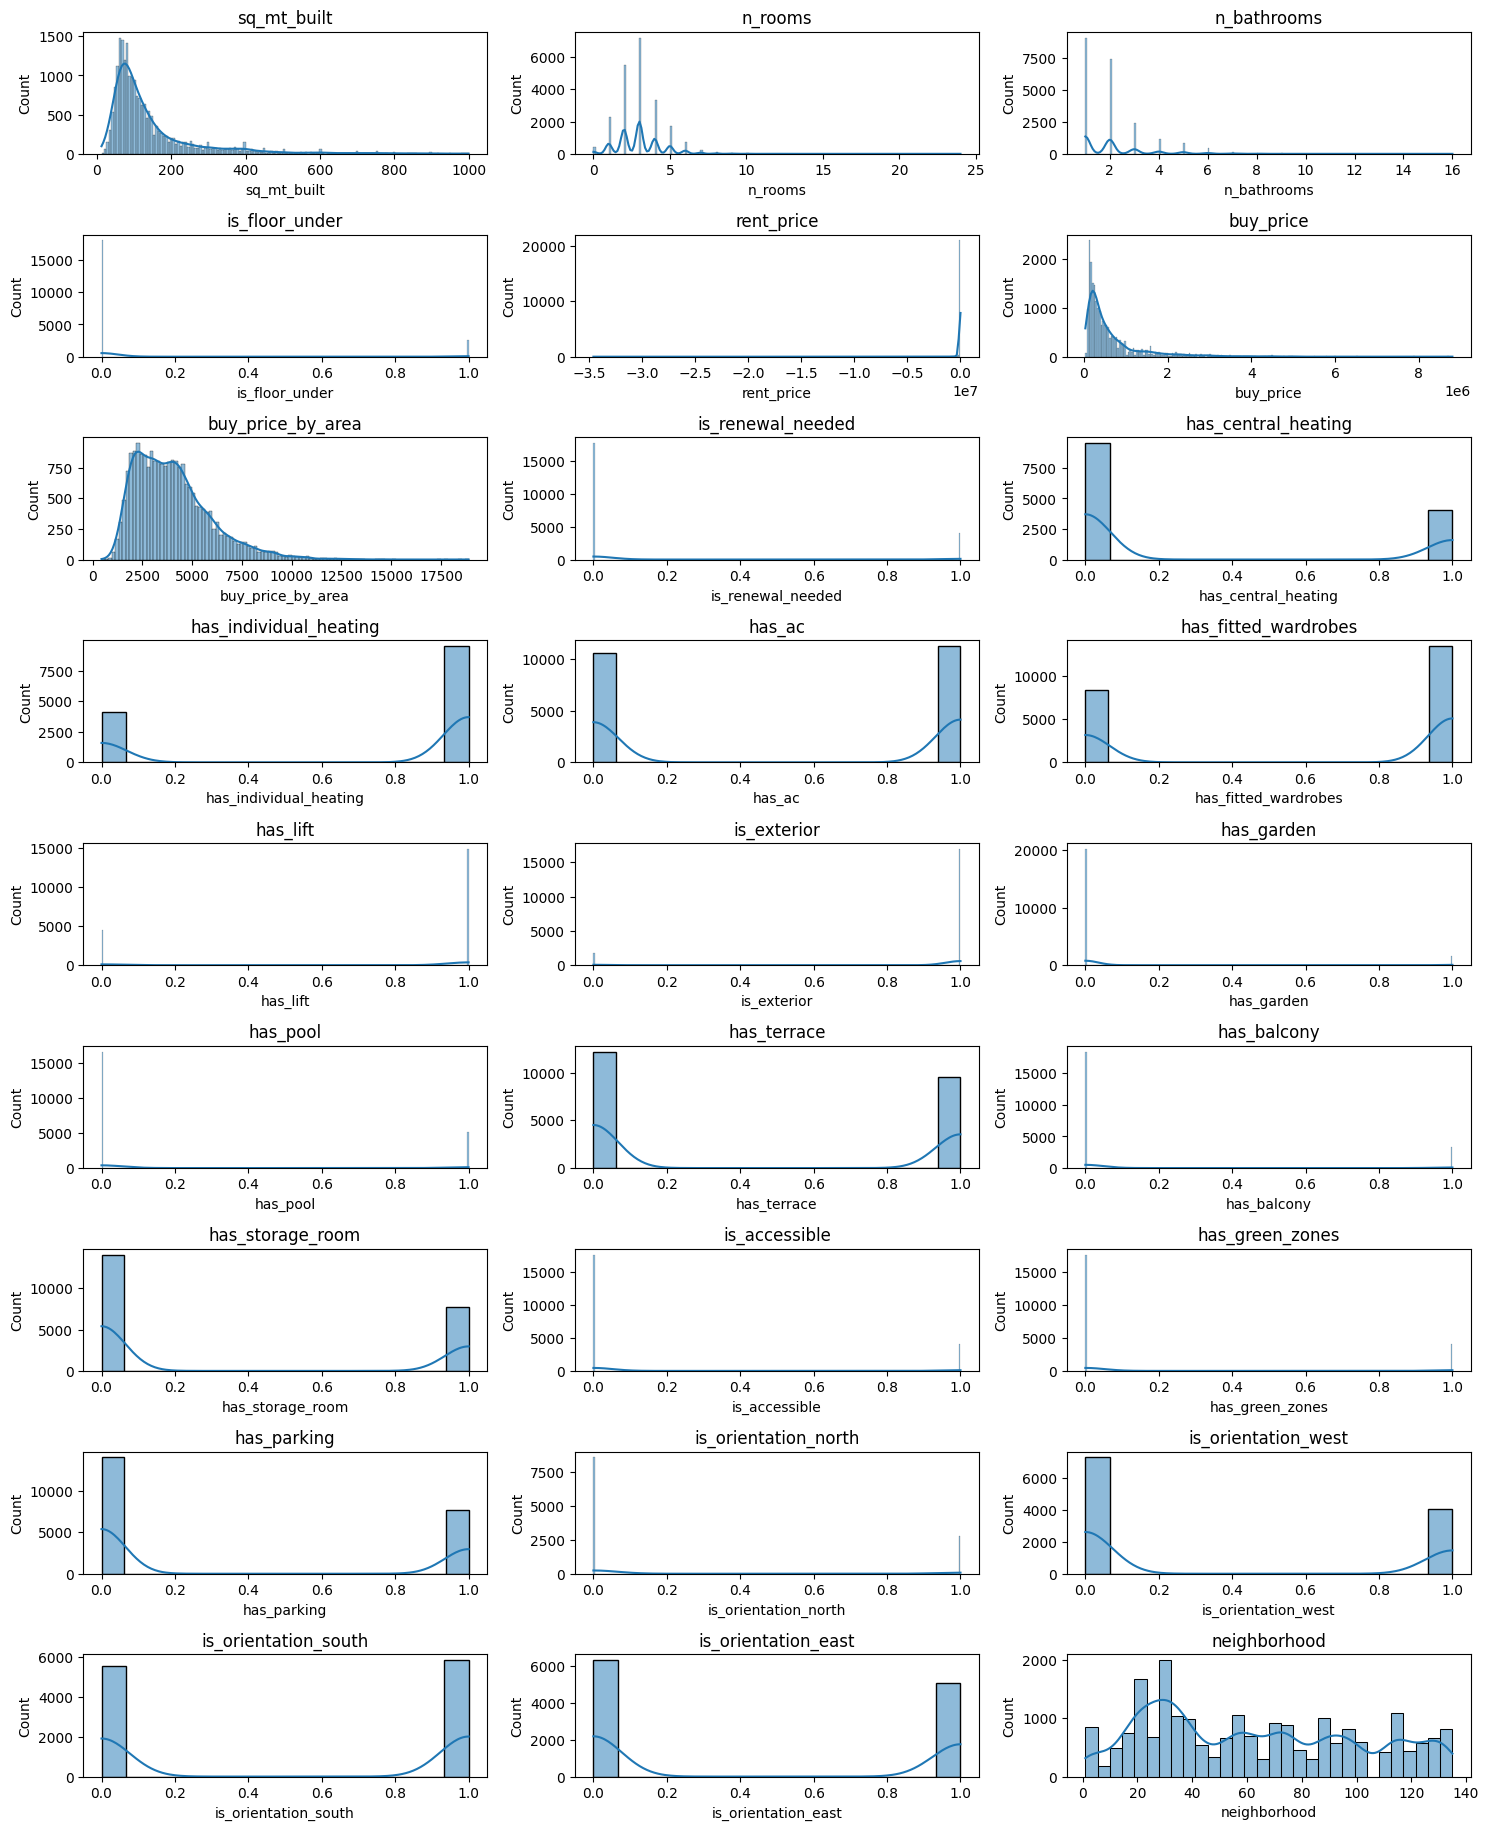

In [35]:
import seaborn as sns

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()
